# 泰坦尼克号幸存者预测

## 一、数据读取与展示

In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 加载并查看文件属性及其前5行数据

In [102]:
data=pd.read_csv('train.csv')
data.head()#查看文件属性及其前5行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 查看每一个属性是否存在缺失值

In [103]:
data.isnull().sum() #查看是否存在缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 查看每一属性的统计信息 

In [104]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 查看训练集中存活情况

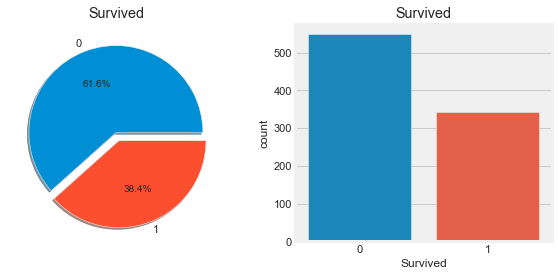

In [105]:
f,ax=plt.subplots(1,2,figsize=(9,4))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#### 结论
* 从上图可以看出891名乘客中约38.4%的乘客最后存活了下来。
* 接下来，我们将从数据中挖掘出更多的信息，看看哪些类别的乘客更容易幸存下来。

## 二、特征理解与分析
特征分为连续值和离散值，离散值：性别（男、女） 登船地点（S,Q,C） 连续值：年龄 票价

### 分析性别与存活之间的关系

In [106]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

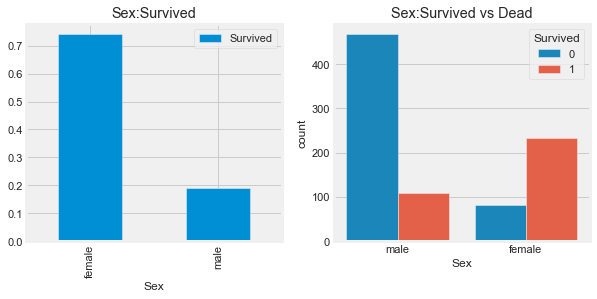

In [107]:
f,ax=plt.subplots(1,2,figsize=(9,4))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex:Survived')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### 结论
* 虽然男人是女人的两倍左右，但女人具有更高的存活率（75%左右）
* 性别将是预测存活情况的一个重要特征属性

### 分析船舱等级与存活之间的关系

In [108]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


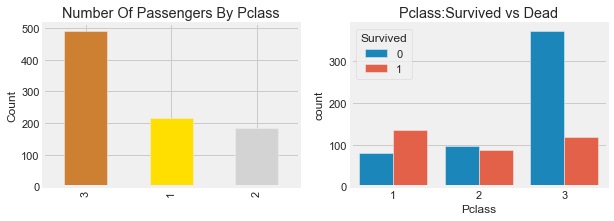

In [109]:
f,ax=plt.subplots(1,2,figsize=(9,3))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

#### 结论
* 船舱等级越高，存活率越高（一等船舱63%，二等船舱48%，三等船舱25%）
* 船舱等级同样将是一个重要特征

### 分析性别和船舱等级同时对存活情况的影响

In [110]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

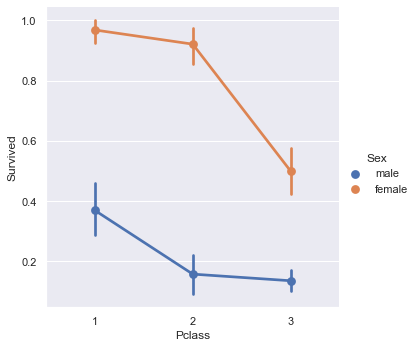

In [111]:
sns.set(font_scale=1)
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

#### 结论
* 船舱等级越高，女性存活率越高（一等船舱95%）
* 不管船舱等级如何，优先考虑救助女性

### 分析（船舱等级&年龄）、（性别&年龄）与存活之间的关系

In [112]:
print('最老乘客的年龄为:',data['Age'].max(),'岁')
print('最小乘客的年龄为:',data['Age'].min(),'岁')
print('乘客平均年龄为:',data['Age'].mean(),'岁')

最老乘客的年龄为: 80.0 岁
最小乘客的年龄为: 0.42 岁
乘客平均年龄为: 29.69911764705882 岁


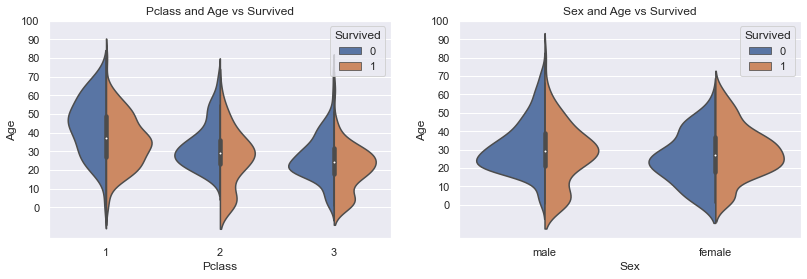

In [113]:
f,ax=plt.subplots(1,2,figsize=(12,4))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### 总结
* 年龄在20-50岁的获救率更高一些
* 对男性来讲，年龄越大，获救率越低

## 三、数据清洗与预处理

### 缺失值填充
* 平均值
* 经验值 
* 回归模型预测
* 剔除掉

In [114]:
#从名字中提取称谓，如从Braund, Mr. Owen Harris中提取出Mr
data['Initial']=0
data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') 
#查看各个称谓的性别分布
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [115]:
#将提取出来的称谓根据性别分成  Master, Miss, Mr, Mrs, Other 五个类别
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data['Initial'][:5]

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [116]:
#根据Master, Miss, Mr, Mrs, Other 五个类别，对类别类的缺失值使用平均值进行填充
ages = data.groupby('Initial')['Age'].mean()
# 使用每组的均值来进行填充
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=int(ages['Mr']+0.5)
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=int(ages['Mrs']+0.5)
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=int(ages['Master']+0.5)
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=int(ages['Miss']+0.5)
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=int(ages['Other']+0.5)

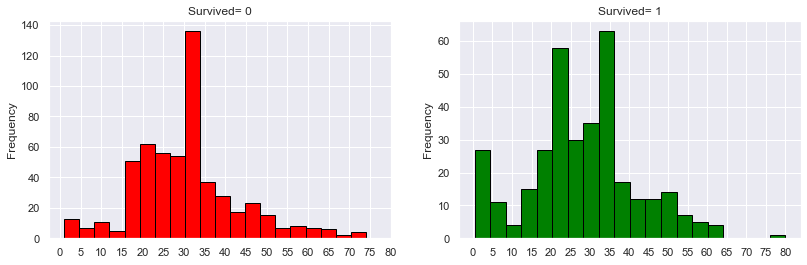

In [117]:
f,ax=plt.subplots(1,2,figsize=(12,4))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

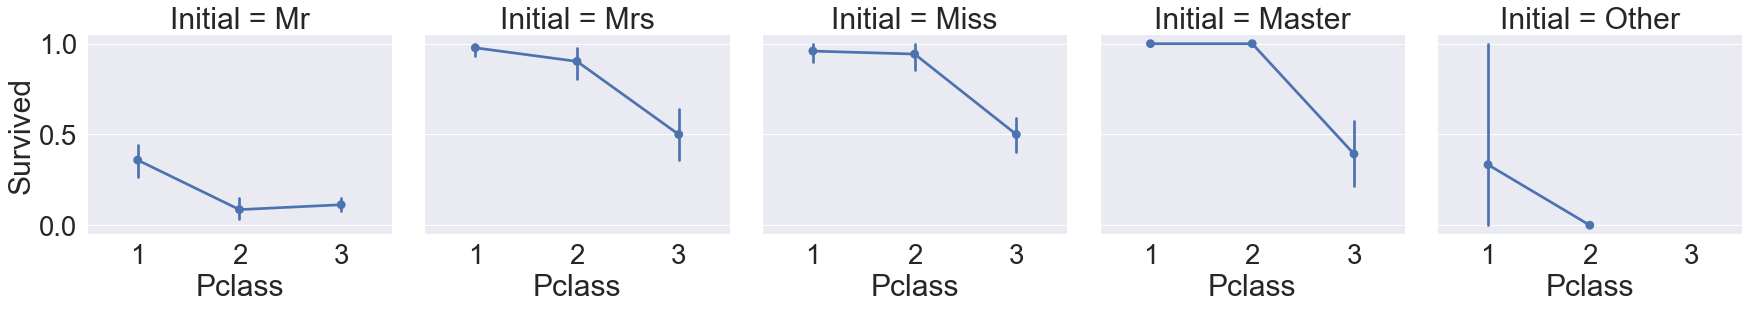

In [118]:
#不同人群在不同船舱等级时的获救率
sns.set(font_scale=2.5)
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

#### 结论
* 妇女和儿童优先得到救助
* 死亡人数最高的是30-35岁年龄组

### 特征选择
一个数据集中的所有特征是否都很重要？可能存在很多冗余特征需要被消除，还需要通过观察从其他特征中提取出新的特征。
#### 年龄特征
* 年龄是一个连续的特征，我们需要将其离散化，然后用于分类中
* 本数据中，年龄范围为0~80，这里我们将其分为5个年龄组，每个年龄组年龄跨度为80/5=16，并用Age_band表示年龄分组属性

In [119]:
data['Age_band']=0
for i in range(5):
    data.loc[(data['Age']>16*i)&(data['Age']<=16*(i+1)),'Age_band']=i
data[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [120]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


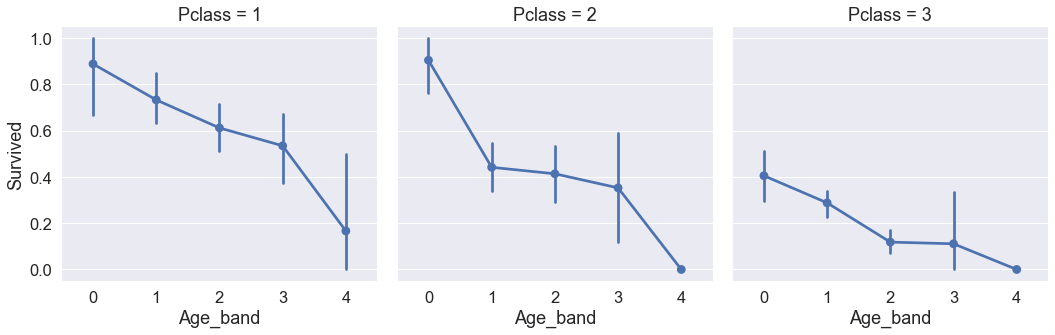

In [121]:
sns.set(font_scale=1.5)
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

生存率随年龄的增加而减少

#### 构建家庭总人数特征Family_size
直接整合兄弟姐妹数量（Parch）和老人孩子数量（SibSp）为家庭总数
家庭人数为0，表示该乘客孤身一个人，我们使用Alone表示其是否孤身一人

In [122]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

#### 船价特征
票价也是连续的特性，所以需要将它转换为离散数值

In [123]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


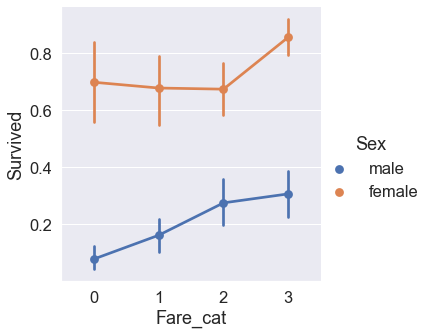

In [124]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

显然，随着Fare_cat增加，存活的几率增加。随着性别的变化，这一特征可能成为建模过程中的一个重要特征。

#### 字符串特征转为数值
性别（Sex），船舱等级（Embarked），年龄分组（Initial）均为字符串，现将它们转为数值

In [125]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
#如上述描述，Embarked字段有两个空缺，这里我们使用众数补全
data['Embarked'].fillna('S',inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [127]:
data[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1


#### 去掉不必要的特征
名称 -->  不包含任何分类信息

年龄 -->  已生成新的特征age_band

票号 -->  不包含任何分类信息

票价 -->  已生成新的特征fare_cat

船仓号 -->  不包含任何分类信息

乘客ID（passengerid） -->  不包含任何分类信息

In [128]:
if 'Name' in data:
    data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
data[:5]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


#### 计算特征之间的相关性

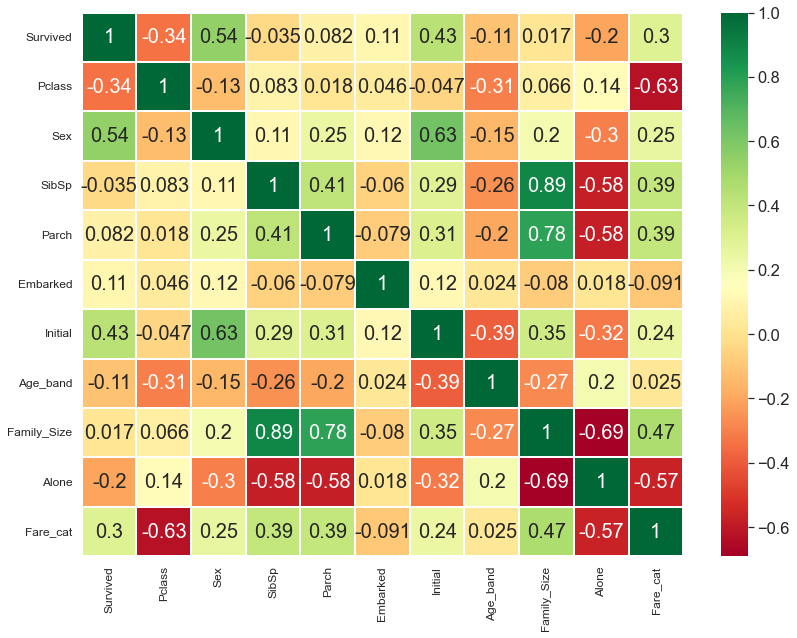

In [133]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

说明如下
* 正相关：如果数值大于0，那么对应的特征呈正相关。1表示完全正相关。
* 负相关：如果数值小于0，则呈负相关。-1表示完全负相关。

* 两个特征高度或完全相关，这意味着两个特征包含高度相似的信息！如SibSp，Parch与Family_Size高度正相关

* 应尽量减少冗余特性，因为可以减少训练时间等优点。

## 四、机器学习建模
基于上述分析，我们得到了一些结论。但不能预测或判断一个乘客是否幸存。现在我们将使用一些分类算法来预测乘客的生存情况：

1）logistic回归

2）支持向量机（非线性和线性）

3）随机森林

4）k-近邻

5）朴素贝叶斯

6）决策树


In [66]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

读取数据并将其拆分为训练集（train_X,train_Y）和测试集（test_X,test_Y）两部分

In [67]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### 非线性SVM

In [68]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('非线性SVM的识别结果为：',metrics.accuracy_score(prediction1,test_Y))

非线性SVM的识别结果为： 0.835820895522388


### 线性SVM

In [69]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('线性SVM的识别结果为：',metrics.accuracy_score(prediction2,test_Y))

线性SVM的识别结果为： 0.8171641791044776


### 逻辑回归

In [70]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('逻辑回归的识别结果为：',metrics.accuracy_score(prediction3,test_Y))

逻辑回归的识别结果为： 0.8134328358208955


### K-近邻(KNN)

In [71]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('KNN的识别结果为：',metrics.accuracy_score(prediction5,test_Y))

KNN的识别结果为： 0.8134328358208955


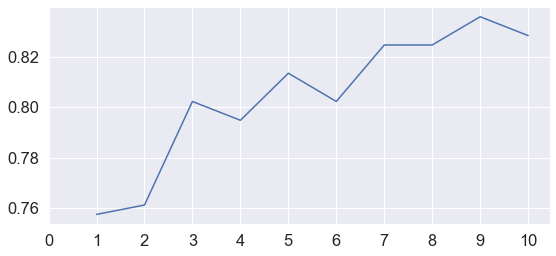

不同k取值时的分类准确度为： [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] 最大的分类准确度为： 0.835820895522388


In [134]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(8,4)
plt.show()
print('不同k取值时的分类准确度为：',a.values,'最大的分类准确度为：',a.values.max())

### 贝叶斯网络

In [74]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('贝叶斯网络的分类结果为：',metrics.accuracy_score(prediction6,test_Y))

贝叶斯网络的分类结果为： 0.8134328358208955


### 随机森林（RF）

In [75]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('随机森林的分类结果为：',metrics.accuracy_score(prediction7,test_Y))

随机森林的分类结果为： 0.8134328358208955


### 交叉验证

In [81]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
# print(kfold)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

KFold(n_splits=10, random_state=22, shuffle=True)


,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.808115,0.045454
Naive Bayes,0.795843,0.054861
Random Forest,0.814869,0.051299


### 混淆矩阵

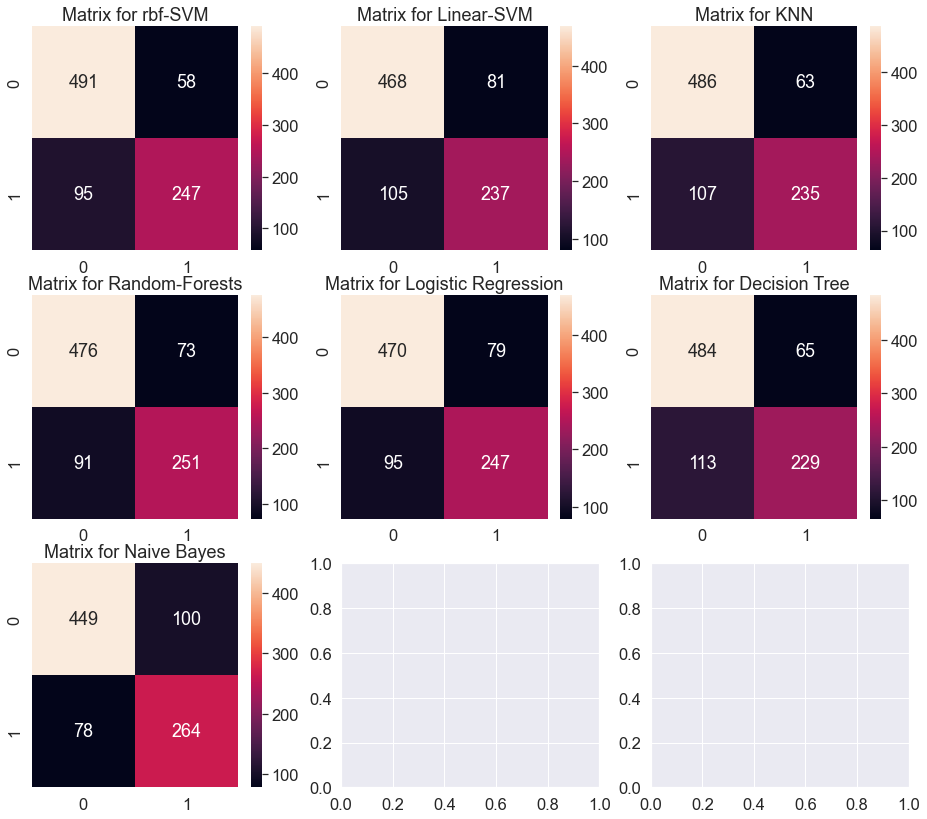

In [136]:
f,ax=plt.subplots(3,3,figsize=(14,14))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### 混淆矩阵解读 （第一个图为例）
* 预测正确率为491（死亡）+ 247（存活），平均分类准确率为（491+247）/ 891＝82.8%
* 58和95都是预测错误的

### 超参数设定
不同分类器都会有一些参数影响着分类结果，这些参数被称为分类器的超参数，如SVM中的正则化系数C和核参数γ，随机森林RF中的决策树个数n_estimators

In [86]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [87]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


### 模型集成
* 投票法
* Bagging：从总体样本当中随机取一部分样本进行训练，通过多次这样的结果，进行投票亦或求取平均值作为结果输出
* Adaboost：集成弱分类器从而达到强分类器的效果

In [88]:
#投票法
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8226716604244693


In [137]:
# bagging
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())
print('\n')

model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [138]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())
print('\n')


from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())
print('\n')

n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

The cross validated score for AdaBoost is: 0.8249188514357055


The cross validated score for Gradient Boosting is: 0.8115230961298376


Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
